In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import  scipy.stats

from sklearn.cluster import KMeans
import sklearn.metrics as smm

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
#Adjust graph size
plt.rcParams['figure.figsize'] = [20, 10]

In [3]:
from IPython.core.display import display, HTML
#Increase output window size
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
df=pd.read_excel('RD.xlsx')

In [5]:
#Add feild MIncome - Monthly Household Income
df['MIncome'] = (df['HHIncome']/12)

In [6]:
#Add feild SpendToIncome - Ratio of monthly spending to monthly household income
df['SpendToIncome'] = df['CardSpendMonth']/df['MIncome']

In [7]:
# Add feild AgeBracket, splitting the group age into groups of approx 10 years
conditions = [df['Age'] <= 25,
              df['Age'] <= 35,
              df['Age'] <= 45,
              df['Age'] <= 55,
              df['Age'] <= 65
             ]
selections = ['18-25','26-35','36-45','46-55','56-65']
df['AgeBracket'] = np.select(conditions,selections,'65+')

In [8]:
# Add feild EduBracket, splitting the group age into groups of approx 10 years
conditions = [df['EducationYears'] <= 8,
              df['EducationYears'] <= 12,
              df['EducationYears'] <= 16
             ]
selections = ['1. Elementary','2. Secondary','3. Post-Secondary']
df['EduBracket'] = np.select(conditions,selections,'4. Graduate')

In [9]:
#View simple numerical statistics on all feilds
df.describe()

Region  TownSize      Age  EducationYears     HHIncome  \
count 5,000.00  5,000.00 5,000.00        5,000.00     5,000.00   
mean      3.00      2.69    47.03           14.54    54,759.60   
std       1.42      1.43    17.77            3.28    55,377.51   
min       1.00      1.00    18.00            6.00     9,000.00   
25%       2.00      1.00    31.00           12.00    24,000.00   
50%       3.00      3.00    47.00           14.00    38,000.00   
75%       4.00      4.00    62.00           17.00    67,000.00   
max       5.00      5.00    79.00           23.00 1,073,000.00   

       DebtToIncomeRatio  HouseholdSize  HomeOwner  CardSpendMonth  Internet  \
count           5,000.00       5,000.00   5,000.00        5,000.00  5,000.00   
mean                9.95           2.20       0.63        3,372.03      1.20   
std                 6.40           1.39       0.48        2,451.45      1.45   
min                 0.00           1.00       0.00            0.00      0.00   
25%                 5.10           1.00       0.00        1,833.77      0.00   
50%                 8.80           2.00       1.00        2,763.60      1.00   
75%                13.60           3.00       1.00        4,185.38      2.00   
max                43.10           9.00       1.00       39,264.10      4.00   

        MIncome  SpendToIncome  
count  5,000.00       5,000.00  
mean   4,563.30           1.08  
std    4,614.79           0.88  
min      750.00           0.00  
25%    2,000.00           0.48  
50%    3,166.67           0.83  
75%    5,583.33           1.40  
max   89,416.67           8.75

In [10]:
#Split HHIncome into 5 sections and SpendToIncome into 10 sections
#HHIncomeBracket only contains the low value of the bracket to assist with ordering of the tables and graphs
df['HHIncomeBracket']=pd.qcut(df.HHIncome,5).astype(str).str.strip('()[]').str.split(', ').str[0].astype(np.float64)
df['SpendToIncomeBracket']=pd.qcut(df.SpendToIncome,10).astype(str)#.str.strip('()[]').str.replace(', ','-')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D348B20710>]],
      dtype=object)

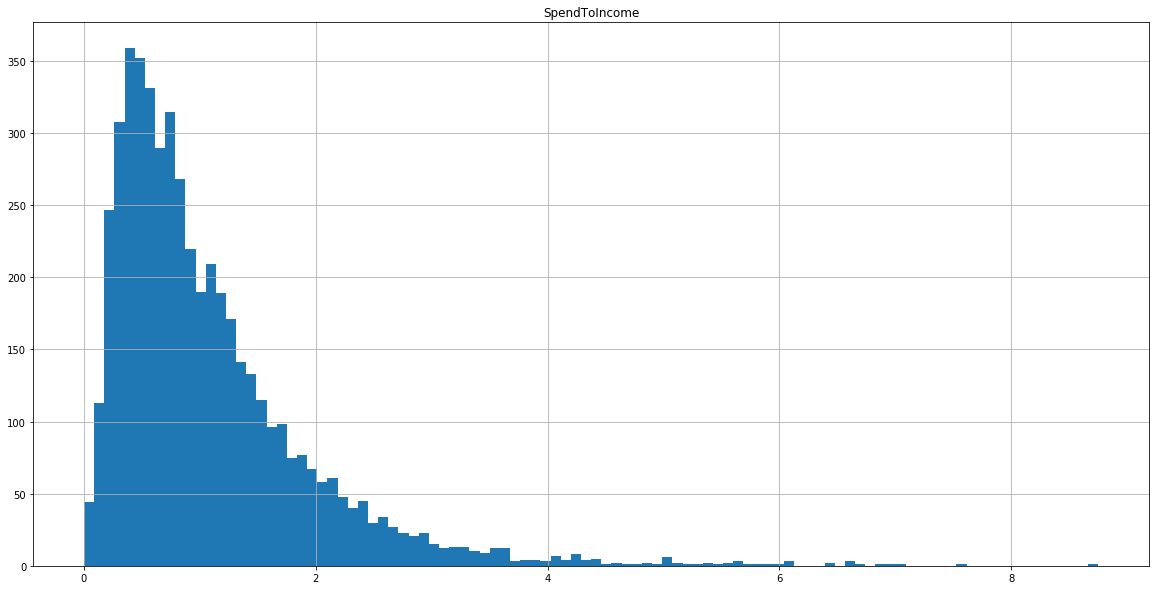

In [11]:
df.hist('SpendToIncome',bins=100)

In [ ]:
#Bivariate Analysis of LoanDefault and SpendToIncome
print('\n','Mean')
display(pd.pivot_table(df,
               index=['LoanDefault'],
               values='SpendToIncome',
              aggfunc=np.mean))
print('\n','Count')
display(pd.pivot_table(df,
               index=['LoanDefault'],
               values='SpendToIncome',
              aggfunc='count'))
table = pd.pivot_table(df,
               index=['LoanDefault'],
               values='SpendToIncome',
              aggfunc=len,margins=True)
table3 = table.div( table.iloc[-1,:], axis=1 )

print('\n','%')
display(table3)
display(df.boxplot('SpendToIncome','LoanDefault'))

In [ ]:
#Multivariate Analysis of LoanDefault and SpendToIncome split by Region
print('\n','Mean')
display(pd.pivot_table(df,
               index=['LoanDefault'],
               columns='Region',
               values='SpendToIncome',
              aggfunc=np.mean))
print('\n','Count')
table = pd.pivot_table(df,
               index=['LoanDefault'],
               columns='Region',
               values='SpendToIncome',
              aggfunc=len,margins=True)
display(table)
table2 = table.div( table.iloc[:,-1], axis=0 )
table3 = table.div( table.iloc[-1,:], axis=1 )
print('\n','% Row')
display(table2)
print('\n','% Column')
display(table3)

#Chi-Square test for independence between Region and LoanDefault
chisq = scipy.stats.chi2_contingency(pd.crosstab(df['Region'],df['LoanDefault']))
print('Chi-Square:',chisq[0])
print('p:',chisq[1])

df.boxplot('SpendToIncome',['Region','LoanDefault'])

In [ ]:
#Multivariate Analysis of LoanDefault and SpendToIncome split by Gender
print('\n','Mean')
display(pd.pivot_table(df,
               index=['LoanDefault'],
               columns='Gender',
               values='SpendToIncome',
              aggfunc=np.mean))
print('\n','Count')
table = pd.pivot_table(df,
               index=['LoanDefault'],
               columns='Gender',
               values='SpendToIncome',
              aggfunc=len,margins=True)
display(table)
table2 = table.div( table.iloc[:,-1], axis=0 )
table3 = table.div( table.iloc[-1,:], axis=1 )
print('\n','% Row')
display(table2)
print('\n','% Column')
display(table3)

#Chi-Square test for independence between Gender and LoanDefault
chisq = scipy.stats.chi2_contingency(pd.crosstab(df['Gender'],df['LoanDefault']))
print('Chi-Square:',chisq[0])
print('p:',chisq[1])

df.boxplot('SpendToIncome',['Gender','LoanDefault'])

In [ ]:
#Bivariate Analysis of LoanDefault and SpendToIncome
#Looking at SpentToIncomeBrackets
print('\n','Count')
display(pd.pivot_table(df,
               index=['LoanDefault'],
               columns='SpendToIncomeBracket',
               values='SpendToIncome',
              aggfunc='count'))
table = pd.pivot_table(df,
               index=['LoanDefault'],
               columns='SpendToIncomeBracket',
               values='SpendToIncome',
              aggfunc=len,margins=True)
table3 = table.div( table.iloc[-1,:], axis=1 )
print('\n','% Column')
display(table3)

#Chi-Square test for independence between Spend to Income Brackets and LoanDefault
chisq = scipy.stats.chi2_contingency(pd.crosstab(df['SpendToIncomeBracket'],df['LoanDefault']))
print('Chi-Square:',chisq[0])
print('p:',chisq[1])


In [ ]:
#Multivariate Analysis of LoanDefault and SpendToIncome split by AgeBracket
print('\n','Mean')
display(pd.pivot_table(df,
               index=['LoanDefault'],
               columns='AgeBracket',
               values='SpendToIncome',
              aggfunc=np.mean))
print('\n','Count')
table = pd.pivot_table(df,
               index=['LoanDefault'],
               columns='AgeBracket',
               values='SpendToIncome',
              aggfunc=len,margins=True)
display(table)
table2 = table.div( table.iloc[:,-1], axis=0 )
table3 = table.div( table.iloc[-1,:], axis=1 )
print('\n','% Row')
display(table2)
print('\n','% Column')
display(table3)

#Chi-Square test for independence between Age Brackets and LoanDefault
chisq = scipy.stats.chi2_contingency(pd.crosstab(df['AgeBracket'],df['LoanDefault']))
print('Chi-Square:',chisq[0])
print('p:',chisq[1])

df.boxplot('SpendToIncome',['AgeBracket','LoanDefault'])

In [ ]:
#Multivariate Analysis of LoanDefault and SpendToIncome split by Education Level
print('\n','Mean')
display(pd.pivot_table(df,
               index=['LoanDefault'],
               columns='EduBracket',
               values='SpendToIncome',
              aggfunc=np.mean))
print('\n','Count')
table = pd.pivot_table(df,
               index=['LoanDefault'],
               columns='EduBracket',
               values='SpendToIncome',
              aggfunc=len,margins=True)
display(table)
table2 = table.div( table.iloc[:,-1], axis=0 )
table3 = table.div( table.iloc[-1,:], axis=1 )
print('\n','% Row')
display(table2)
print('\n','% Column')
display(table3)

#Chi-Square test for independence between Education Level and LoanDefault
chisq = scipy.stats.chi2_contingency(pd.crosstab(df['EduBracket'],df['LoanDefault']))
print('Chi-Square:',chisq[0])
print('p:',chisq[1])

df.boxplot('SpendToIncome',['EduBracket','LoanDefault'])

In [ ]:
#Multivariate Analysis of LoanDefault and SpendToIncome split by Voting History
print('\n','Mean')
display(pd.pivot_table(df,
               index=['LoanDefault'],
               columns='Votes',
               values='SpendToIncome',
              aggfunc=np.mean))
print('\n','Count')
table = pd.pivot_table(df,
               index=['LoanDefault'],
               columns='Votes',
               values='SpendToIncome',
              aggfunc=len,margins=True)
display(table)
table2 = table.div( table.iloc[:,-1], axis=0 )
table3 = table.div( table.iloc[-1,:], axis=1 )
print('\n','% Row')
display(table2)
print('\n','% Column')
display(table3)

#Chi-Square test for independence between Voting History and LoanDefault
chisq = scipy.stats.chi2_contingency(pd.crosstab(df['Votes'],df['LoanDefault']))
print('Chi-Square:',chisq[0])
print('p:',chisq[1])

df.boxplot('SpendToIncome',['Votes','LoanDefault'])

In [ ]:
#Multivariate Analysis of LoanDefault and SpendToIncome split by Income Brackets
print('\n','Mean')
display(pd.pivot_table(df,
               index=['LoanDefault'],
               columns='HHIncomeBracket',
               values='SpendToIncome',
              aggfunc=np.mean))
print('\n','Count')
table = pd.pivot_table(df,
               index=['LoanDefault'],
               columns='HHIncomeBracket',
               values='SpendToIncome',
              aggfunc=len,margins=True)
display(table)
table2 = table.div( table.iloc[:,-1], axis=0 )
table3 = table.div( table.iloc[-1,:], axis=1 )
print('\n','% Row')
display(table2)
print('\n','% Column')
display(table3)

#Chi-Square test for independence between Income Bracket and LoanDefault
chisq = scipy.stats.chi2_contingency(pd.crosstab(df['HHIncomeBracket'],df['LoanDefault']))
print('Chi-Square:',chisq[0])
print('p:',chisq[1])

df.boxplot('SpendToIncome',['HHIncomeBracket','LoanDefault'])

In [ ]:
#Multivariate Analysis of LoanDefault and SpendToIncome split by Home Ownership
print('\n','Mean')
display(pd.pivot_table(df,
               index=['LoanDefault'],
               columns='HomeOwner',
               values='SpendToIncome',
              aggfunc=np.mean))
print('\n','Count')
table = pd.pivot_table(df,
               index=['LoanDefault'],
               columns='HomeOwner',
               values='SpendToIncome',
              aggfunc=len,margins=True)
display(table)
table2 = table.div( table.iloc[:,-1], axis=0 )
table3 = table.div( table.iloc[-1,:], axis=1 )
print('\n','% Row')
display(table2)
print('\n','% Column')
display(table3)

#Chi-Square test for independence between Home Ownership and LoanDefault
chisq = scipy.stats.chi2_contingency(pd.crosstab(df['HomeOwner'],df['LoanDefault']))
print('Chi-Square:',chisq[0])
print('p:',chisq[1])

df.boxplot('SpendToIncome',['HomeOwner','LoanDefault'])

In [ ]:
#Multivariate Analysis of LoanDefault and SpendToIncome split by Internet Connected Devices
print('\n','Mean')
display(pd.pivot_table(df,
               index=['LoanDefault'],
               columns='Internet',
               values='SpendToIncome',
              aggfunc=np.mean))
print('\n','Count')
table = pd.pivot_table(df,
               index=['LoanDefault'],
               columns='Internet',
               values='SpendToIncome',
              aggfunc=len,margins=True)
display(table)
table2 = table.div( table.iloc[:,-1], axis=0 )
table3 = table.div( table.iloc[-1,:], axis=1 )
print('\n','% Row')
display(table2)
print('\n','% Column')
display(table3)


#Chi-Square test for independence between Internet Connected Devices and LoanDefault
chisq = scipy.stats.chi2_contingency(pd.crosstab(df['Internet'],df['LoanDefault']))
print('Chi-Square:',chisq[0])
print('p:',chisq[1])

df.boxplot('SpendToIncome',['Internet','LoanDefault'])

In [ ]:
# Add feild AgeBracket2, splitting the group age into 2 groups
conditions = [df['Age'] <= 55
             ]
selections = ['Young']
df['AgeBracket2'] = np.select(conditions,selections,'Old')

In [ ]:
#Multivariate Analysis of LoanDefault and SpendToIncome split by AgeBracket
# print('\n','Mean')
# display(pd.pivot_table(df,
#                index=['LoanDefault'],
#                columns='AgeBracket2',
#                values='SpendToIncome',
#               aggfunc=np.mean))
print('\n','Count')
table = pd.pivot_table(df,
               index=['LoanDefault'],
               columns='AgeBracket2',
               values='SpendToIncome',
              aggfunc=len,margins=True)
display(table)
table2 = table.div( table.iloc[:,-1], axis=0 )
table3 = table.div( table.iloc[-1,:], axis=1 )
print('\n','% Row')
display(table2)
print('\n','% Column')
display(table3)

#Chi-Square test for independence between Age Brackets and LoanDefault
chisq = scipy.stats.chi2_contingency(pd.crosstab(df['AgeBracket2'],df['LoanDefault']))
print('Chi-Square:',chisq[0])
print('p:',chisq[1])

# df.boxplot('SpendToIncome',['AgeBracket2','LoanDefault'])

In [ ]:
#Multivariate Analysis of LoanDefault and SpendToIncome split by AgeBracket
# print('\n','Mean')
# display(pd.pivot_table(df,
#                index=['LoanDefault'],
#                columns='AgeBracket2',
#                values='SpendToIncome',
#               aggfunc=np.mean))
print('\n','Count')
table = pd.pivot_table(df,
               index=['Internet'],
               columns='AgeBracket2',
               values='SpendToIncome',
              aggfunc=len,margins=True)
display(table)
table2 = table.div( table.iloc[:,-1], axis=0 )
table3 = table.div( table.iloc[-1,:], axis=1 )
print('\n','% Row')
display(table2)
print('\n','% Column')
display(table3)

#Chi-Square test for independence between Age Brackets and LoanDefault
chisq = scipy.stats.chi2_contingency(pd.crosstab(df['AgeBracket2'],df['Internet']))
print('Chi-Square:',chisq[0])
print('p:',chisq[1])

# df.boxplot('SpendToIncome',['AgeBracket2','LoanDefault'])

In [ ]:
x.describe()

In [ ]:
tableMax = x['HHIncome'].mean()

In [ ]:
internetMax = (x['Internet']).mean()
ageMax = (x['Age']).mean()
cardMax = (x['CardSpendMonth']).mean()
regionMax = (x['Region']).mean()
edMax = (x['EducationYears']).mean()
houseMax = (x['HouseholdSize']).mean()
hoMax = (x['HomeOwner']).mean()

In [ ]:
x['Internet'] = x['Internet'] * (tableMax/internetMax)
x['Age']=x['Age'] * (tableMax/ageMax)
x['CardSpendMonth']=x['CardSpendMonth'] * (tableMax/cardMax)
x['Region']=x['Region'] * (tableMax/regionMax)
x['EducationYears']=x['EducationYears'] * (tableMax/edMax)
x['HouseholdSize'] =x['HouseholdSize'] * (tableMax/houseMax)
x['HomeOwner']=x['HomeOwner'] * (tableMax/hoMax)

In [45]:
x = df[['Internet','Age','HHIncome','CardSpendMonth','EducationYears','HouseholdSize','HomeOwner']]

In [ ]:
x = df[['Age']]

In [13]:
x.describe()

Internet      Age     HHIncome  CardSpendMonth  EducationYears  \
count  5,000.00 5,000.00     5,000.00        5,000.00        5,000.00   
mean       1.20    47.03    54,759.60        3,372.03           14.54   
std        1.45    17.77    55,377.51        2,451.45            3.28   
min        0.00    18.00     9,000.00            0.00            6.00   
25%        0.00    31.00    24,000.00        1,833.77           12.00   
50%        1.00    47.00    38,000.00        2,763.60           14.00   
75%        2.00    62.00    67,000.00        4,185.38           17.00   
max        4.00    79.00 1,073,000.00       39,264.10           23.00   

       HouseholdSize  HomeOwner  
count       5,000.00   5,000.00  
mean            2.20       0.63  
std             1.39       0.48  
min             1.00       0.00  
25%             1.00       0.00  
50%             2.00       1.00  
75%             3.00       1.00  
max             9.00       1.00

In [14]:
model = KMeans(n_clusters=2)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
z=pd.DataFrame(df['LoanDefault'])

In [16]:
z['kmean']=model.labels_

In [17]:
pd.crosstab(z['kmean'],z['LoanDefault'])

LoanDefault    No   Yes
kmean                  
0            3449  1051
1             380   120

In [18]:
y = np.where(z['LoanDefault']=='No',0,1)

In [19]:
smm.accuracy_score(y, model.labels_)

0.7138

In [20]:
smm.confusion_matrix(y, model.labels_)

array([[3449,  380],
       [1051,  120]], dtype=int64)

In [21]:
pd.crosstab(z['kmean'],z['LoanDefault'])

LoanDefault    No   Yes
kmean                  
0            3449  1051
1             380   120

In [22]:
smm.accuracy_score(y, model.labels_)

0.7138

In [96]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from __future__ import print_function

import os
import subprocess
# dtree = DecisionTreeClassifier(min_samples_split=40, random_state=99)
# dtree.fit(x, y)

In [169]:
def holdout(train,x):
    temp=train
    frac = 1-x/len(train)
    train=temp.sample(frac=frac,random_state=200)
    test2=temp.drop(train.index)
    frac = 1-x/len(train)
    temp=train.sample(frac=frac,random_state=200)
    test3=train.drop(temp.index)
    train=temp
    frac = 1-x/len(train)
    temp=train.sample(frac=frac,random_state=200)
    test4=train.drop(temp.index)
    train=temp
    frac = 1-x/len(train)
    temp=train.sample(frac=frac,random_state=200)
    test5=train.drop(temp.index)
    test1=temp
    testsets = []
    testsets.append(test1)
    testsets.append(test2)
    testsets.append(test3)
    testsets.append(test4)
    testsets.append(test5)
    
    counter1=0
    counter2=0
    trainsets=[]
    for i in testsets:
        counter1+=1
        initTrain = True 
        temp=None
        for j in testsets:
            counter2+=1
            if counter1==counter2:
                continue
            if initTrain:
                temp=j
                initTrain=False
            else:
                temp=temp.append(j)
        counter2=0
        trainsets.append(temp)
    return testsets,trainsets

In [133]:
x = df[['Internet','Age','HHIncome','CardSpendMonth','EducationYears','HouseholdSize','HomeOwner','LoanDefault']]

In [186]:
testsets,trainsets= holdout(x,1000)

In [187]:
list3 = [list(a) for a in zip(testsets, trainsets)]

In [ ]:
['Internet','Age','HHIncome','CardSpendMonth','EducationYears','HouseholdSize','HomeOwner']

In [211]:
df

CustomerID  Region  TownSize  Gender  Age  EducationYears  \
0     0002-GTOKLU-YVY       5         4    Male   63              16   
1     0003-RLTRGE-IW2       1         1    Male   52              11   
2     0003-UTGKPR-PRU       2         2    Male   73              14   
3     0008-ZIQQOT-SGB       3         1  Female   40              21   
4     0012-CIVYLF-839       4         5    Male   40              12   
5     0014-DOIOFX-LXB       2         2  Female   37              12   
6     0014-SHVSIE-LP9       3         3    Male   39              19   
7     0016-KTTUQR-TJY       2         4    Male   47              16   
8     0016-XBFXXW-2G0       4         4  Female   19              14   
9     0016-YQHYTA-32U       5         5  Female   27              16   
10    0017-SYHARA-8BI       1         2    Male   50              20   
11    0022-QFOJNN-XSH       3         4    Male   39              13   
12    0022-UFDRNE-TAW       5         3    Male   28              19   
13    0023-SFNINN-16J       3         2  Female   68              15   
14    0023-WKLZQN-M6X       5         1  Female   35              17   
15    0024-UQUVXG-79W       1         1    Male   26              21   
16    0026-GRFYZR-6M4       3         1  Female   60               8   
17    0030-BUXRDA-LRX       3         2  Female   52              12   
18    0030-HAVPBZ-2V8       4         1  Female   77              13   
19    0030-LPYZKX-CUL       5         4  Female   27              16   
20    0031-DMPSUG-NZ2       1         4    Male   21              15   
21    0031-EYRVUV-U32       3         1    Male   46              13   
22    0031-PLCHXI-LOA       3         5    Male   27              18   
23    0031-UJQGML-YHK       3         3    Male   50              13   
24    0032-AKTRIG-C0N       1         1    Male   44              19   
25    0034-EFPVBU-CUF       5         3    Male   78              12   
26    0037-VHZRCO-JXT       5         4  Female   73              10   
27    0038-LEEHSR-PWO       3         1    Male   53              19   
28    0043-WEGFXZ-ZJ2       1         2  Female   77              15   
29    0044-LVJIBD-G76       4         4  Female   49              16   
...               ...     ...       ...     ...  ...             ...   
4970  9932-HDHLNA-IRD       4         2    Male   33              15   
4971  9932-JRQLDZ-AYG       3         4    Male   26              14   
4972  9936-JXYWJK-YJ6       1         1    Male   60              10   
4973  9937-SFPLRK-H9Y       2         4    Male   70              17   
4974  9939-UQSAIS-TYG       4         4  Female   50              20   
4975  9943-HAMXQB-MUT       5         5  Female   71              13   
4976  9949-AFKEEO-2UJ       3         2    Male   68              20   
4977  9950-DBPJLI-54J       5         4  Female   24              13   
4978  9952-CNPOYJ-0KL       2         4    Male   59              15   
4979  9953-IKWKOC-PRS       4         1    Male   47              14   
4980  9953-WBREQG-X9M       3         2  Female   42              19   
4981  9955-CVMUZH-O6X       5         1  Female   63              14   
4982  9957-EJTUGH-O2N       3         5    Male   54              12   
4983  9959-FTDURM-67O       3         2  Female   38              11   
4984  9963-LIXPAS-PYV       5         5  Female   25              10   
4985  9968-VJKTZG-NNZ       5         3    Male   49              14   
4986  9975-VKATOU-J4H       5         5  Female   37               9   
4987  9976-EWHQDK-CWR       3         3  Female   63              11   
4988  9976-IIYYXO-712       4         3  Female   23               7   
4989  9976-YGHFSH-GYQ       4         4  Female   43              16   
4990  9979-YOPGLE-VN1       3         3    Male   78              11   
4991  9980-ZIBEGL-OBS       3         5  Female   52              19   
4992  9984-QRMGJV-LBA       2         3    Male   71              13   
4993  9986-NEXLVW-QB2       1         1  Female   6

In [210]:
trees=[]
for i in list3:
    trainy = i[1]['LoanDefault']
    testy= i[0]['LoanDefault']
    train=i[1][['Internet','Age','MIncome','CardSpendMonth','EducationYears','HouseholdSize','HomeOwner']]
    test=i[0][['Internet','Age','MIncome','CardSpendMonth','EducationYears','HouseholdSize','HomeOwner']]
    dtree = DecisionTreeClassifier(min_samples_split=50, random_state=99)
    dtree.fit(train, trainy)
    trees.append(dtree)
    print('Accuracy score Test:',dtree.score(test,testy))
    print('Accuracy score Train:',dtree.score(train,trainy))
    dis = (pd.DataFrame(dtree.feature_importances_ ).transpose())
    dis.columns = ['Internet','Age','MIncome','CardSpendMonth','EducationYears','HouseholdSize','HomeOwner']
    test['tree']=dtree.predict(test)
    test['real']=testy
    display(dis)
    
    dis2=(pd.DataFrame(smm.confusion_matrix(test['tree'], test['real'])))
    dis2.columns=['Actual 0','Actual 1']
    display(dis2)

Accuracy score Test: 0.748
Accuracy score Train: 0.81675


Internet  Age  HHIncome  CardSpendMonth  EducationYears  HouseholdSize  \
0      0.01 0.56      0.14            0.16            0.06           0.05   

   HomeOwner  
0       0.01

Actual 0  Actual 1
0       683       157
1        95        65

Accuracy score Test: 0.749
Accuracy score Train: 0.8225


Internet  Age  HHIncome  CardSpendMonth  EducationYears  HouseholdSize  \
0      0.02 0.56      0.18            0.13            0.06           0.04   

   HomeOwner  
0       0.01

Actual 0  Actual 1
0       685       165
1        86        64

Accuracy score Test: 0.749
Accuracy score Train: 0.82375


Internet  Age  HHIncome  CardSpendMonth  EducationYears  HouseholdSize  \
0      0.03 0.53      0.14            0.20            0.08           0.02   

   HomeOwner  
0       0.01

Actual 0  Actual 1
0       680       177
1        74        69

Accuracy score Test: 0.729
Accuracy score Train: 0.82925


Internet  Age  HHIncome  CardSpendMonth  EducationYears  HouseholdSize  \
0      0.02 0.52      0.14            0.18            0.07           0.05   

   HomeOwner  
0       0.01

Actual 0  Actual 1
0       641       160
1       111        88

Accuracy score Test: 0.749
Accuracy score Train: 0.81925


Internet  Age  HHIncome  CardSpendMonth  EducationYears  HouseholdSize  \
0      0.02 0.55      0.18            0.16            0.08           0.01   

   HomeOwner  
0       0.00

Actual 0  Actual 1
0       681       158
1        93        68

In [183]:
trainy = train['LoanDefault']
testy= test['LoanDefault']

KeyError: 'LoanDefault'

In [105]:
train=train[['Internet','Age','HHIncome','CardSpendMonth','EducationYears','HouseholdSize','HomeOwner']]
test=test[['Internet','Age','HHIncome','CardSpendMonth','EducationYears','HouseholdSize','HomeOwner']]

In [106]:
dtree = DecisionTreeClassifier(min_samples_split=50, random_state=99)
dtree.fit(train, trainy)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [107]:
print(dtree.score(train,trainy))
print(dtree.feature_importances_ )

0.8225
[0.01871626 0.55629487 0.18479763 0.12968881 0.05975933 0.04147631
 0.00926677]


In [108]:
print(dtree.score(test,testy))

0.749


In [110]:
test['tree']=dtree.predict(test)
test['real']=testy
test.to_clipboard(sep='\t')

In [111]:
smm.confusion_matrix(test['tree'], test['real'])

array([[685, 165],
       [ 86,  64]], dtype=int64)

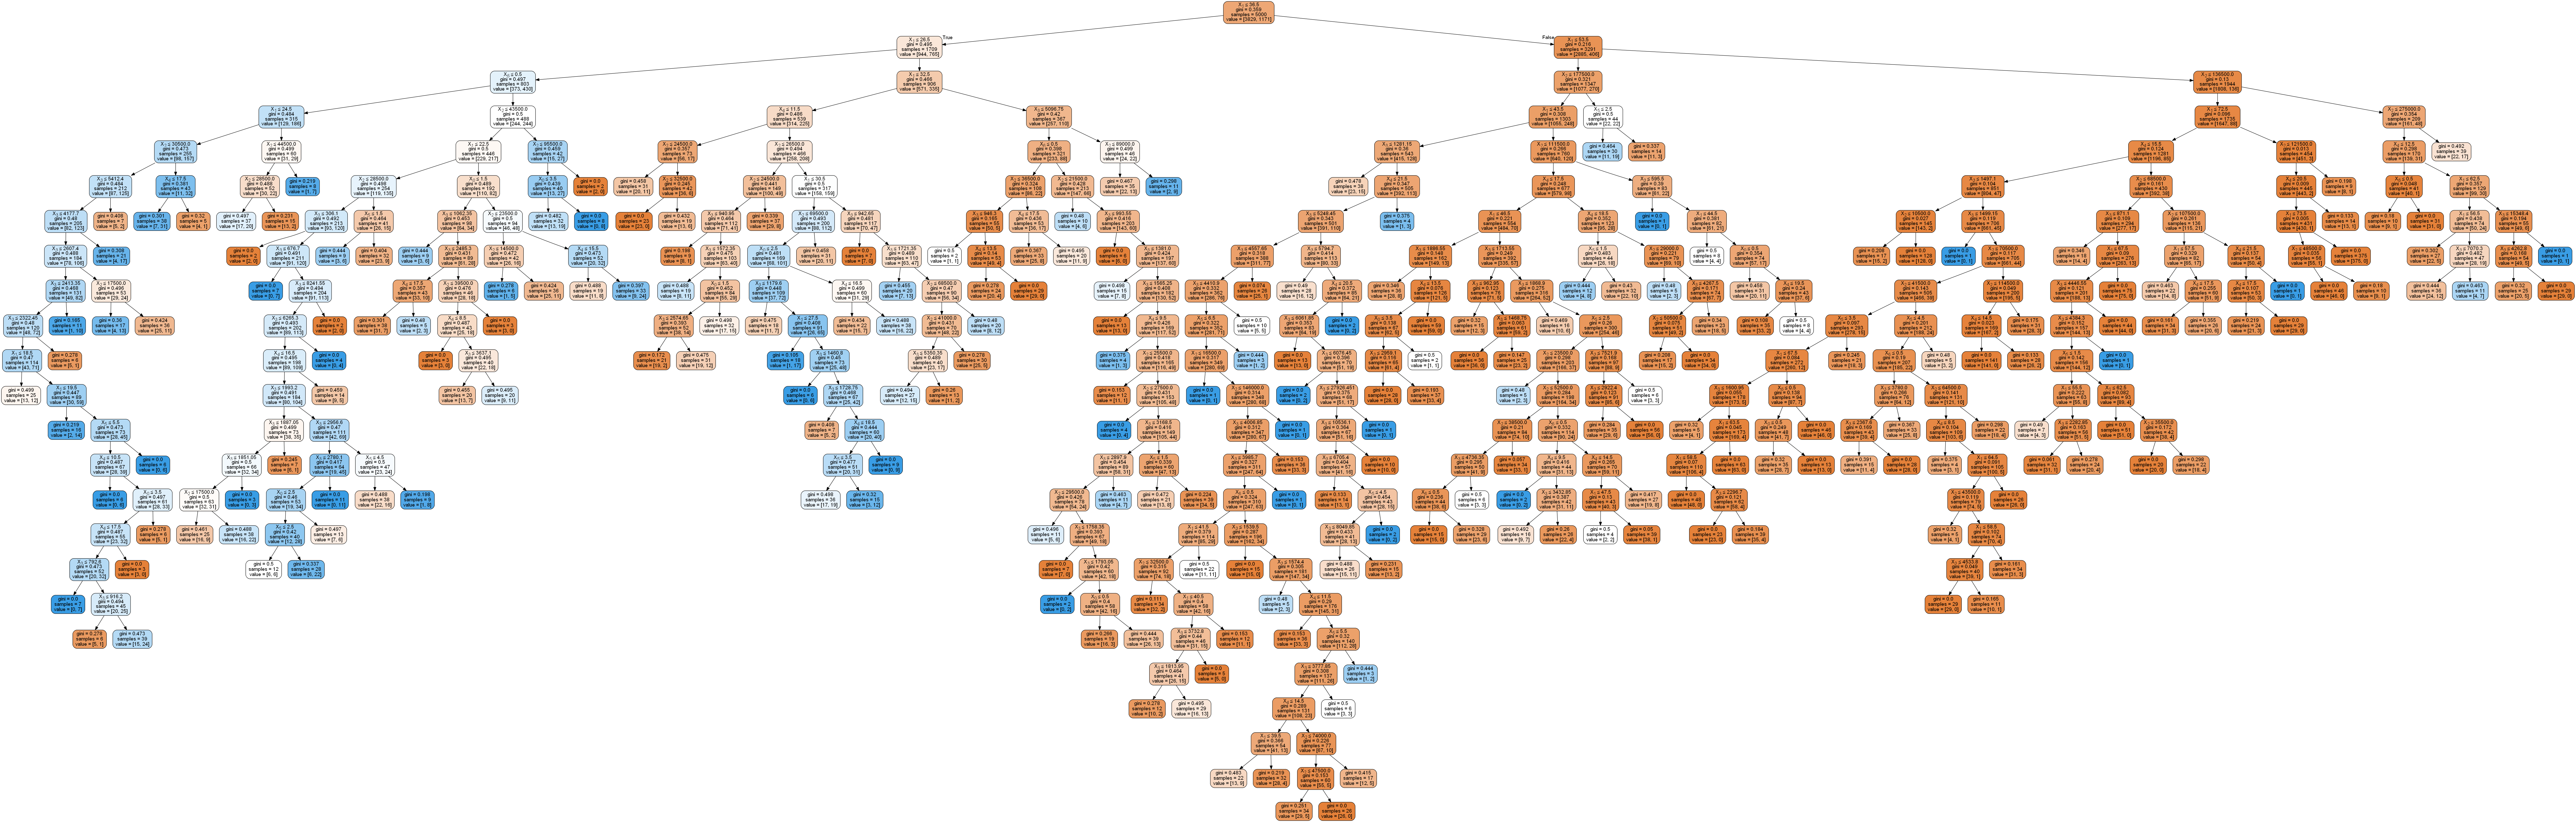

In [54]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
visualize_tree(dt,x.columns)

In [ ]:
import pydot

In [ ]:
pydot.find_graphviz()

In [55]:
from subprocess import check_call
check_call(['dot','-Tpng','dt.dot','-o','OutputFil2e.png'])

0

In [31]:
x.describe()

Internet      Age     HHIncome  CardSpendMonth   Region  \
count  5,000.00 5,000.00     5,000.00        5,000.00 5,000.00   
mean       1.20    47.03    54,759.60        3,372.03     3.00   
std        1.45    17.77    55,377.51        2,451.45     1.42   
min        0.00    18.00     9,000.00            0.00     1.00   
25%        0.00    31.00    24,000.00        1,833.77     2.00   
50%        1.00    47.00    38,000.00        2,763.60     3.00   
75%        2.00    62.00    67,000.00        4,185.38     4.00   
max        4.00    79.00 1,073,000.00       39,264.10     5.00   

       EducationYears  HouseholdSize  HomeOwner  
count        5,000.00       5,000.00   5,000.00  
mean            14.54           2.20       0.63  
std              3.28           1.39       0.48  
min              6.00           1.00       0.00  
25%             12.00           1.00       0.00  
50%             14.00           2.00       1.00  
75%             17.00           3.00       1.00  
max             23.00           9.00       1.00